In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

# Gaussian random number generator

In [2]:
def GRNG(N, m, s):
    X = []
    for i in range(N):
        U = random.uniform(0, 1)
        V = random.uniform(0, 1)
        z = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
        x = m + s*z
        X.append(x)
    X = np.asarray(X)
    return X

#  Logistic regression

o Case1 : N = 50, mx1 = my1 = 1, mx2 = my2 = 10, vx1 = vy1 = vx2 = vy2 = 2

In [12]:
# Dataset
DX1 = GRNG(50, 1, 2)
DY1 = GRNG(50, 1, 2)
DX2 = GRNG(50, 10, 2)
DY2 = GRNG(50, 10, 2)

D1 = np.c_[DX1, DY1]    # D1 = (x1, y1)...50*2
Class0 = np.zeros((50,1))

D2 = np.c_[DX2, DY2]    # D2 = (x1, y1)...50*2
Class1 = np.ones((50,1))

y  = np.r_[Class0, Class1] # Label 50個0 50個1 ; 100*1

# Newton's method

In [13]:
# initial w
w = np.array([[0],[0],[0]])

# Create A 100*3
ones = np.ones((100, 1))
A0 = np.r_[D1, D2] 
A = np.c_[ones, A0]

D = np.identity(100)
I = np.identity(100)
sigmoid = np.zeros((100,1))

# Newton's method
err,count = 2,0
grad = np.ones((3,1))

while err > 1e-8:
    for i in range(100):
        sigmoid[i,0] = 1 / (1 + np.exp(-np.dot(A[i],w)))
    # Hessian matrix
    D = (sigmoid*(1-sigmoid))*I
    Hessian = np.dot(np.dot(A.T,D),A) # Hessian = 3*3

    # gradient
    pgrad = grad

    grad = np.dot(A.T, (sigmoid-y)) # grad = 3*1
    
    wnew = w - np.dot(np.linalg.inv(Hessian), grad)
    err = abs((grad-pgrad).sum())
    w = wnew   
    count += 1


predict = np.where(sigmoid > 0.5, 1, 0) # predict=100*1
NX1,NX2,NY1,NY2 = [],[],[],[]
# confusion matrix
TP,FP,TN,FN = 0,0,0,0
for i in range(100):
    if predict[i,0] == y[i,0]:
        if predict[i,0] == 0:
            TP += 1
            NX1.append(A0[i,0])
            NY1.append(A0[i,1])
        else:
            TN +=1
            NX2.append(A0[i,0])
            NY2.append(A0[i,1])
    elif predict[i,0] != y[i,0]:
        if predict[i,0] == 1:
            FP += 1
            NX2.append(A0[i,0])
            NY2.append(A0[i,1])
        else:
            FN +=1
            NX1.append(A0[i,0])
            NY1.append(A0[i,1])

print("Loop = ",count,"\n")
print("Newton's method: \n")
print("w:")
print(w[0,0],"\n",w[1,0],"\n",w[2,0],"\n")
print("Confusion Matrix:")
print("              Predict cluster 0   Predict cluster 1")
print("cluster 0","       ",TP,"                ",FP)
print("cluster 1","       ",FN,"                ",TN,"\n")
print("Sensitivity (Successfully predict cluster 0):",TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):",TN/(FP+TN))

Loop =  26 

Newton's method: 

w:
-66.4805226659857 
 4.833303202758349 
 7.151521939580845 

Confusion Matrix:
              Predict cluster 0   Predict cluster 1
cluster 0         50                  0
cluster 1         0                  50 

Sensitivity (Successfully predict cluster 0): 1.0
Specificity (Successfully predict cluster 2): 1.0


# Gradient descent

In [14]:
gama = 0.01

# initial w
w = np.array([[0],[0],[0]])

# Create A 100*3
ones = np.ones((100, 1))
A0 = np.r_[D1, D2] 
A = np.c_[ones, A0]

# gradient
sigmoid = np.zeros((100,1))

# Gradient descent
err,count = 1,0
grad = np.ones((3,1))
while err > 1e-8 :
    pgrad = grad
    for i in range(100):
        sigmoid[i,0] = 1 / (1 + np.exp(-np.dot(A[i],w)))
    grad = np.dot(A.T, (y-sigmoid)) # grad = 3*1
    
    wnew = w + gama*grad # find maximize => gradient ascent
    err = ((grad-pgrad).sum())**2
    w = wnew
    count += 1

predict = np.where(sigmoid > 0.5, 1, 0) # predict=100*1
GX1,GX2,GY1,GY2 = [],[],[],[]
# confusion matrix
TP,FP,TN,FN = 0,0,0,0
for i in range(100):
    if predict[i,0] == y[i,0]:
        if predict[i,0] == 0:
            TN += 1
            GX1.append(A0[i,0])
            GY1.append(A0[i,1])
        else:
            TP +=1
            GX2.append(A0[i,0])
            GY2.append(A0[i,1])
    elif predict[i,0] != y[i,0]:
        if predict[i,0] == 1:
            FP += 1
            GX2.append(A0[i,0])
            GY2.append(A0[i,1])
        else:
            FN +=1
            GX1.append(A0[i,0])
            GY1.append(A0[i,1])

print("Loop = ",count,"\n")
print("Gradient descent: \n")
print("w:")
print(w[0,0],"\n",w[1,0],"\n",w[2,0],"\n")
print("Confusion Matrix:")
print("              Predict cluster 0   Predict cluster 1")
print("cluster 0","       ",TP,"                ",FP)
print("cluster 1","       ",FN,"                ",TN,"\n")
print("Sensitivity (Successfully predict cluster 0):",TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):",TN/(FP+TN))

Loop =  1195 

Gradient descent: 

w:
-9.393641477605847 
 0.835806545335592 
 0.9604328769957482 

Confusion Matrix:
              Predict cluster 0   Predict cluster 1
cluster 0         50                  0
cluster 1         0                  50 

Sensitivity (Successfully predict cluster 0): 1.0
Specificity (Successfully predict cluster 2): 1.0


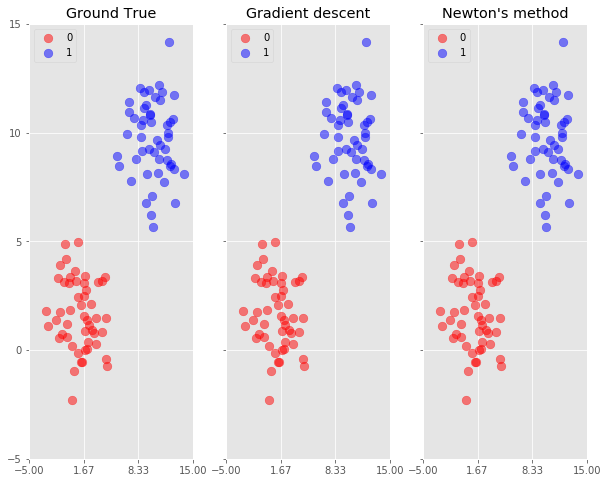

In [15]:
dotX0 = [DX1,GX1,NX1] #NX1
dotX1 = [DX2,GX2,NX2] #NX2
dotY0 = [DY1,GY1,NY1] #NY1 
dotY1 = [DY2,GY2,NY2] #NY2 
title = ['Ground True','Gradient descent',"Newton's method"]

plt.style.use('ggplot')
fig, img = plt.subplots(1, 3, figsize=(10, 8), sharey=True, sharex=True)
img[0].set_ylim(-5, 15)
plt.yticks(np.linspace(-5, 15, 5))
img[0].set_xlim(-5, 15)
plt.xticks(np.linspace(-5, 15, 4))
for i in range(3):
    img[i].scatter(dotX0[i], dotY0[i], s=75, c='r', alpha=0.5)
    img[i].scatter(dotX1[i], dotY1[i], s=75, c='b', alpha=0.5)
    img[i].set_title(title[i])
    img[i].legend('01')

plt.show()

# Case2 : N = 50, mx1 = my1 = 1, mx2 = my2 = 3, vx1 = vy1 = 2, vx2 = vy2 = 4

#  Logistic regression

In [23]:
# Dataset
DX1 = GRNG(50, 1, 2)
DY1 = GRNG(50, 1, 2)
DX2 = GRNG(50, 3, 4)
DY2 = GRNG(50, 3, 4)

D1 = np.c_[DX1, DY1]    # D1 = (x1, y1)...100*2
Class0 = np.zeros((50,1))

D2 = np.c_[DX2, DY2]    # D2 = (x1, y1)...100*2
Class1 = np.ones((50,1))

y  = np.r_[Class0, Class1] # Label 50個0 50個1 ; 100*1

In [24]:
# initial w
w = np.array([[0],[0],[0]])

# Create A 100*3
ones = np.ones((100, 1))
A0 = np.r_[D1, D2] 
A = np.c_[ones, A0]

D = np.identity(100)
I = np.identity(100)
sigmoid = np.zeros((100,1))

# Newton's method
err,count = 2,0
grad = np.ones((3,1))
#for z in range(2):
while err > 1e-8:
    for i in range(100):
        sigmoid[i,0] = 1 / (1 + np.exp(-np.dot(A[i],w)))
    # Hessian matrix
    D = (sigmoid*(1-sigmoid))*I
    Hessian = np.dot(np.dot(A.T,D),A) # Hessian = 3*3

    # gradient
    pgrad = grad

    grad = np.dot(A.T, (sigmoid-y)) # grad = 3*1
    
    wnew = w - np.dot(np.linalg.inv(Hessian), grad)
    err = abs((grad-pgrad).sum())
    w = wnew   
    count += 1


predict = np.where(sigmoid > 0.5, 1, 0) # predict=100*1
NX1,NX2,NY1,NY2 = [],[],[],[]
# confusion matrix
TP,FP,TN,FN = 0,0,0,0
for i in range(100):
    if predict[i,0] == y[i,0]:
        if predict[i,0] == 0:
            TP += 1
            NX1.append(A0[i,0])
            NY1.append(A0[i,1])
        else:
            TN +=1
            NX2.append(A0[i,0])
            NY2.append(A0[i,1])
    elif predict[i,0] != y[i,0]:
        if predict[i,0] == 1:
            FP += 1
            NX2.append(A0[i,0])
            NY2.append(A0[i,1])
        else:
            FN +=1
            NX1.append(A0[i,0])
            NY1.append(A0[i,1])

print("Loop = ",count,"\n")
print("Newton's method: \n")
print("w:")
print(w[0,0],"\n",w[1,0],"\n",w[2,0],"\n")
print("Confusion Matrix:")
print("              Predict cluster 0   Predict cluster 1")
print("cluster 0","       ",TP,"                ",FP)
print("cluster 1","       ",FN,"                ",TN,"\n")
print("Sensitivity (Successfully predict cluster 0):",TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):",TN/(FP+TN))

Loop =  7 

Newton's method: 

w:
-1.1600098235405147 
 0.2731160621368859 
 0.2991138861595888 

Confusion Matrix:
              Predict cluster 0   Predict cluster 1
cluster 0         39                  11
cluster 1         15                  35 

Sensitivity (Successfully predict cluster 0): 0.7222222222222222
Specificity (Successfully predict cluster 2): 0.7608695652173914


In [25]:
# initial w
w = np.array([[0],[0],[0]])

# Create A 100*3
ones = np.ones((100, 1))
A0 = np.r_[D1, D2] 
A = np.c_[ones, A0]

# Gradient Descent
gama = 0.01
sigmoid = np.zeros((100,1))

# Newton's method
err,count = 999,0
grad = np.ones((3,1))
for i in range(10):
# while err > 1e-1 :
    pgrad = grad
    # gradient
    for i in range(100):
        sigmoid[i,0] = 1 / (1 + np.exp(-np.dot(A[i],w)))
    grad = np.dot(A.T, (y-sigmoid)) # grad = 3*1
    
    wnew = w + gama*grad # find maximize => gradient ascent
    err = abs((grad-pgrad).sum())
    w = wnew
    count += 1

predict = np.where(sigmoid > 0.5, 1, 0) # predict=100*1
GX1,GX2,GY1,GY2 = [],[],[],[]
# confusion matrix
TP,FP,TN,FN = 0,0,0,0
for i in range(100):
    if predict[i,0] == y[i,0]:
        if predict[i,0] == 0:
            TP += 1
            GX1.append(A0[i,0])
            GY1.append(A0[i,1])
        else:
            TN +=1
            GX2.append(A0[i,0])
            GY2.append(A0[i,1])
    elif predict[i,0] != y[i,0]:
        if predict[i,0] == 1:
            FP += 1
            GX2.append(A0[i,0])
            GY2.append(A0[i,1])
        else:
            FN +=1
            GX1.append(A0[i,0])
            GY1.append(A0[i,1])

print("Loop = ",count,"\n")
print("Gradient descent: \n")
print("w:")
print(w[0,0],"\n",w[1,0],"\n",w[2,0],"\n")
print("Confusion Matrix:")
print("              Predict cluster 0   Predict cluster 1")
print("cluster 0","       ",TP,"                ",FP)
print("cluster 1","       ",FN,"                ",TN,"\n")
print("Sensitivity (Successfully predict cluster 0):",TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):",TN/(FP+TN))

Loop =  10 

Gradient descent: 

w:
-0.8766393868772516 
 0.04279218854975819 
 0.12815241824011891 

Confusion Matrix:
              Predict cluster 0   Predict cluster 1
cluster 0         23                  27
cluster 1         8                  42 

Sensitivity (Successfully predict cluster 0): 0.7419354838709677
Specificity (Successfully predict cluster 2): 0.6086956521739131


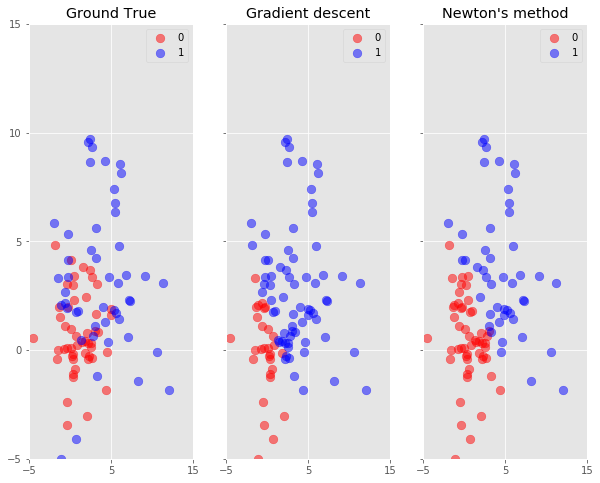

In [26]:
dotX0 = [DX1,GX1,NX1]
dotX1 = [DX2,GX2,NX2]
dotY0 = [DY1,GY1,NY1] 
dotY1 = [DY2,GY2,NY2] 
title = ['Ground True','Gradient descent',"Newton's method"]

plt.style.use('ggplot')
fig, img = plt.subplots(1, 3, figsize=(10, 8), sharey=True, sharex=True)
img[0].set_ylim(-5, 15)
plt.yticks(np.linspace(-5, 15, 5))
img[0].set_xlim(-5, 15)
plt.xticks(np.linspace(-5, 15, 3))
for i in range(3):
    img[i].scatter(dotX0[i], dotY0[i], s=75, c='r', alpha=0.5)
    img[i].scatter(dotX1[i], dotY1[i], s=75, c='b', alpha=0.5)
    img[i].set_title(title[i])
    img[i].legend('01')

plt.show()

 # EM

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import math
import copy
from functools import reduce

tr_imag_idx3 = 'train-images.idx3-ubyte'
tr_label_idx1 = 'train-labels.idx1-ubyte'

In [2]:
def decode_idx3(idx3_file):
    # read 二進位
    bin_data = open(idx3_file, 'rb').read()

    # 解析header，依次為number、#image、image height、image width
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)

    # analysis dataset
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images

def decode_idx1(idx1_file):
    # read 二進位
    bin_data = open(idx1_file, 'rb').read()

    # 解析header，依次為number & label
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)

    # analysis dataset
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels

def load_train_imag(file=tr_imag_idx3):
     return decode_idx3(file)
def load_train_label(file=tr_label_idx1):
    return decode_idx1(file)

In [35]:
train_imag = load_train_imag()
train_label = load_train_label()

def CheckData():
    # Check top 10 data point & label
    for i in range(20,30):
        print (train_label[i]) # data value
        plt.imshow(train_imag[i], cmap='gray')
        plt.show()
        #print (train_imag[i]) # array

In [36]:
N = 60000

# Once

In [62]:
trainimg = copy.deepcopy(train_imag).reshape(60000,784,1)
preP = copy.deepcopy(train_imag).reshape(60000,1,784)

trainimg[np.where(trainimg < 128)] = 0 #bin0
trainimg[np.where(trainimg >= 128)] = 1 #bin1

preP[np.where(preP < 128)] = 0.8  
preP[np.where(preP >= 128)] = 0.2

Ppix = np.vstack((preP[1],preP[6]))

l = [5,7,9,0,18,15,17,4]
for i in range(8):
    Ppix = np.vstack((Ppix, preP[l[i]]))

In [64]:
pindex = [] # len(pindex = 784)
for i in range(784):
    cindex = np.where(trainimg[:N, i ,0]==0) # trainimg 中第i行的 row 為 0 的index
    pindex.append(cindex) 

Index0, Index1 = [], []
for i in range(N):
    cindex0 = np.where(trainimg[i, : ,0]==0) # trainimg 中第i列的 row 為 0 的index
    Index0.append(cindex0) 

for i in range(N):
    cindex1 = np.where(trainimg[i, : ,0]==1) # trainimg 中第列的 row 為 1 的index
    Index1.append(cindex1) 
    
lamda = np.array([0.1])
lamda = lamda.repeat(10) # lamda = 1*10
Ppix.tolist
Psub = (1 - Ppix) # Ppix 10*748 ; Psub 10*748

w = np.ones((10,N))
denomi = np.ones((10,N)) 
deno = np.ones((1,N))

o Iteration:

In [66]:
# E Step
for i in range(N):
    for ii in range(10):
        denomi[ii, i] =  lamda[ii]*reduce(lambda x,y:x*y,Ppix[ii,Index0[i][0]],10.**50)*reduce(lambda x,y:x*y,Psub[ii,Index1[i][0]],10.**50)
deno = np.sum(denomi,axis=0)
w = denomi / deno

In [24]:
# M Step
for i in range(10):
    lamda[i] = reduce(lambda x,y:x+y, w[i,:])/N

for i in range(10):
    for ii in range(784):
        Ppix[i,ii] = reduce(lambda x,y:x+y, w[i, pindex[ii][0]])

Sum_N_w = Ppix[:, 0].reshape(10,1)
Ppix = Ppix /Sum_N_w

# Iterative

In [37]:
trainimg = copy.deepcopy(train_imag).reshape(60000,784,1)
preP = copy.deepcopy(train_imag).reshape(60000,784)

trainimg[np.where(trainimg < 128)] = 0 #bin0
trainimg[np.where(trainimg >= 128)] = 1 #bin1

preP = np.where(preP < 128,0.8,0.2)  

Ppix = np.vstack((preP[1],preP[3]))

l = [5,7,2,0,13,15,17,4]
for i in range(8):
    Ppix = np.vstack((Ppix, preP[l[i]]))

In [38]:
pindex = [] # len(pindex = 784)
for i in range(784):
    cindex = np.where(trainimg[:N, i]==0) # trainimg 中第i行的 row 為 0 的index
    pindex.append(cindex) 

Index0, Index1 = [], []
for i in range(N):
    Index0.append(np.where(trainimg[i, :,0]==0.))# trainimg 中第N列的 row 為 0 的index

for i in range(N):
     Index1.append(np.where(trainimg[i, :,0]==1.))# trainimg 中第N列的 row 為 1 的index

lamda = np.array([0.1])
lamda = lamda.repeat(10) # lamda = 1*10

Psub = (1 - Ppix) # Ppix 10*748 ; Psub 10*748

w = np.ones((10,N))
denomi = np.ones((10,N)) 
deno = np.ones((1,N))
Sum_N_w = np.ones((10,1))

- loop 
<br>lamda:1-10 ; Ppix:10-784 ; w:10-60000 </br>
<br>denomi:10-60000 ; deno: 1-60000 </br>

In [39]:
errlamda,errP0,count = 1, 1, 0
while errlamda>1e-15 or errP0>0.08:
    # E Step
    for i in range(N):
        for ii in range(10):
            denomi[ii, i] =  lamda[ii]*reduce(lambda x,y:x*y,Ppix[ii,Index0[i][0]],10.**50)*reduce(lambda x,y:x*y,Psub[ii,Index1[i][0]],10.**50)
    deno = np.sum(denomi,axis=0).reshape((1,N))
    w = denomi / deno
    
    prelamda = copy.deepcopy(lamda)
    preP = copy.deepcopy(Ppix)
    
    # M Step
    for i in range(10):
        lamda[i] = (w[i,:].sum())/N

    for i in range(10):
        for ii in range(784):
            Ppix[i,ii] = reduce(lambda x,y:x+y,w[i,pindex[ii][0]])
        Sum_N_w[i,0] = w[i,:].sum()

    Ppix = Ppix /Sum_N_w
    
    
    errlamda = abs((prelamda-lamda).sum())
    errP0 = abs((preP[0]-Ppix[0]).sum())
    count += 1

In [40]:
plabel = np.argmax(w, axis=0)
mat = np.zeros((10,10), dtype=int)

for i in range(N):
    mat[int(train_label[i]),int(plabel[i])] += 1
mat

array([[3099,  301,    3,   36,    0, 1106,  273,  146,    6,  953],
       [   0, 5281,    0,    0,    0,   18,    2,    3,    1, 1437],
       [   7, 3184,  913,  255,    0,  385,  288,  165,   11,  750],
       [   0, 1229,    3, 2004,    0, 2006,   25,   29,    6,  829],
       [   1,  387,    0,    0,  351,    0,   40,  581,    0, 4482],
       [   1, 1034,    1,  168,    0, 2349,   40,   43,    9, 1776],
       [  12, 1166,    0,    0,    3,  371, 3347,   11,    0, 1008],
       [   0,  482,    0,    1,   67,   26,    1, 2574,    1, 3113],
       [   0, 2175,    1,  903,    1,  226,   33,  184,  948, 1380],
       [   5,  186,    1,   36,  123,   52,    7,  970,    0, 4569]])

In [43]:
for i in range(10):
    print("Confusion Matrix:",i)
    print("                 Predict number", i,   "Predict not number", i)
    print("Is Number ","      ",mat[i,i],"              ",mat[i,:].sum()-mat[i,i])
    print("Not Number ","     ",mat[:,i].sum()-mat[i,i],"              ",mat[:i,:i].sum()+mat[i+1:,:i].sum()+mat[:i,i+1:].sum()+mat[i+1:,i+1:].sum(),"\n")
    print("Sensitivity (Successfully predict number",i,"):",mat[i,i]/(mat[i,:].sum()))
    print("Specificity (Successfully predict not number",i,"):",(mat[:i,:i].sum()+mat[i+1:,:i].sum()+mat[:i,i+1:].sum()+mat[i+1:,i+1:].sum())/(N-mat[:,i].sum()))
    print("-----------------------------------------------")    

Confusion Matrix: 0
                 Predict number 0 Predict not number 0
Is Number         3099                2824
Not Number        26                54051 

Sensitivity (Successfully predict number 0 ): 0.5232145872024312
Specificity (Successfully predict not number 0 ): 0.9503472527472527
-----------------------------------------------
Confusion Matrix: 1
                 Predict number 1 Predict not number 1
Is Number         5281                1461
Not Number        10144                43114 

Sensitivity (Successfully predict number 1 ): 0.7832987244141204
Specificity (Successfully predict not number 1 ): 0.9672237801458217
-----------------------------------------------
Confusion Matrix: 2
                 Predict number 2 Predict not number 2
Is Number         913                5045
Not Number        9                54033 

Sensitivity (Successfully predict number 2 ): 0.15323934206109432
Specificity (Successfully predict not number 2 ): 0.9146044212735706
--------------

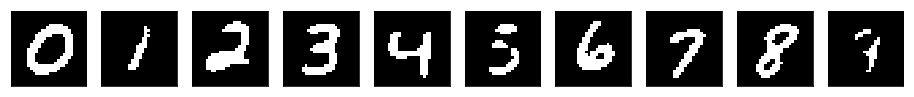

Iterative= 8 

Total error 0.5760833333333333


In [45]:
img0 = np.where(Ppix > 0.5, 0, 1)
img = img0.reshape((10,28,28))

fig, arrimg = plt.subplots(1, 10, figsize=(16, 16))
for i in range(10):
    arrimg[i].imshow(img[i],cmap='gray')
    arrimg[i].axes.get_xaxis().set_visible(False)
    arrimg[i].axes.get_yaxis().set_visible(False)
plt.show()
print("Iterative=",count,"\n")

TotTP = 0
for i in range(10):
    TotTP = mat[i,i] + TotTP
print("Total error",(N-TotTP)/N)